# Introduction

This lab illustrates various linkage options for agglomerative clustering on a 2D embedding of the digits dataset. The goal of this lab is to show how different linkage strategies behave and not to find good clusters for the digits. This is why the example works on a 2D embedding.

# Import Libraries

We start by importing the necessary libraries for this lab. We will be using numpy, matplotlib, manifold, and datasets from scikit-learn to perform agglomerative clustering.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from time import time
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

# Load and Prepare the Dataset

We load the digits dataset and prepare it for clustering by extracting the data and target labels. We also set the random seed to zero to ensure reproducibility.

In [2]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape
np.random.seed(0)

# Visualize the Dataset

We visualize the dataset by computing a 2D embedding of the digits dataset using manifold.SpectralEmbedding() and plotting the scatter plot with different markers for each digit.

Computing embedding
Done.


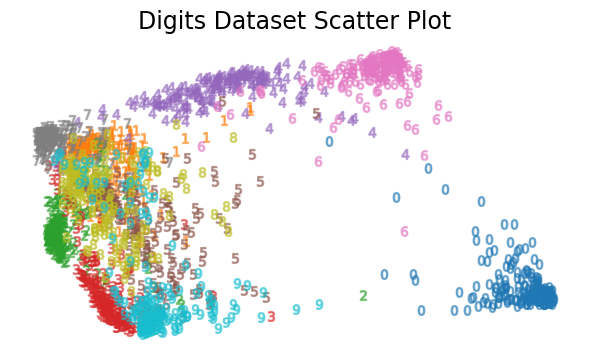

In [3]:
def plot_dataset(X_red):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    plt.title('Digits Dataset Scatter Plot', size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")
plot_dataset(X_red)

# Agglomerative Clustering with Different Linkage Strategies

We perform agglomerative clustering with different linkage strategies: ward, average, complete, and single. We set the number of clusters to 10 for all the strategies. We then plot the clustering results using different colors for each digit.

ward :	0.17s
average :	0.02s
complete :	0.02s
single :	0.01s


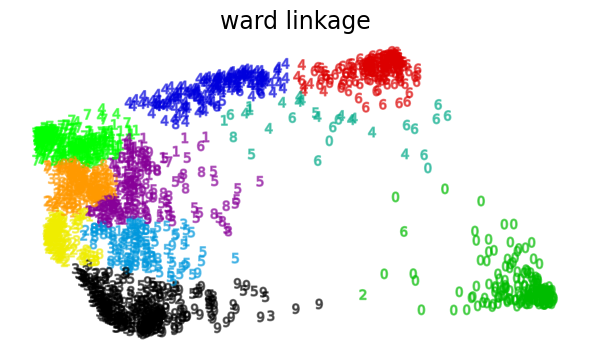

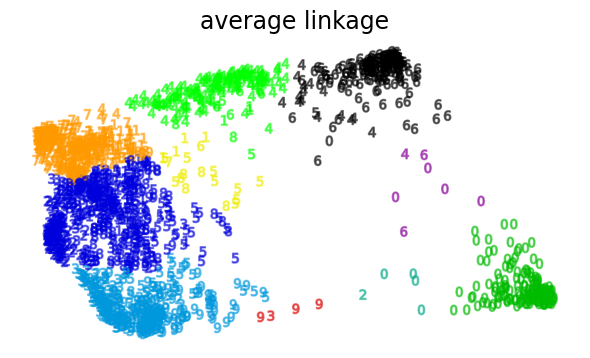

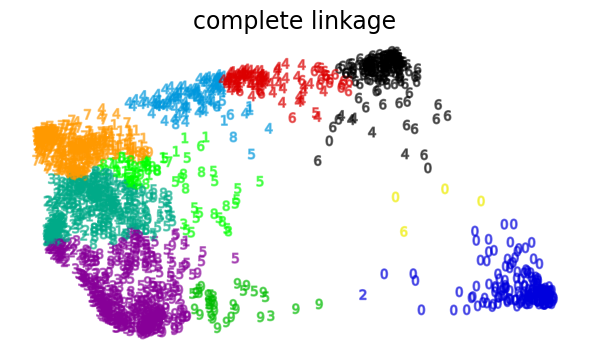

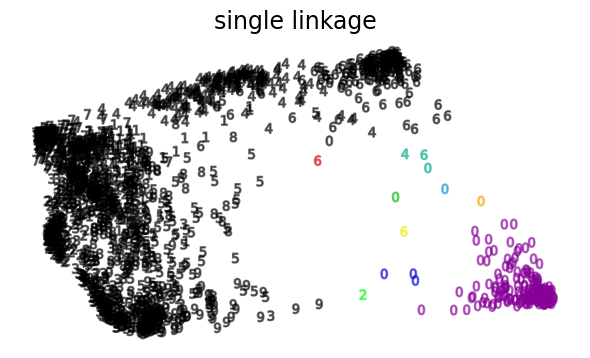

In [4]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

plt.show()

# Summary

In this lab, we learned how to perform agglomerative clustering on the digits dataset using different linkage strategies. We also visualized the dataset and clustering results for each strategy. The results show that different linkage strategies produce different clustering results, and we should choose the strategy that best fits our needs.